<h1>Deepfake Detection using Benford's Law</h1>
<p><b>Hypothesis : Deepfake or GAN images do not follow Benford's Law while Natural images do.</b><br>Experiments conducted:<br>
    <ul>
        <li>Setup a GAN network to generate images</li>
        <li>Analyze different transform functions for benford's law and choose the best one</li>
        <li>Analyze generated and real images using Benford's law</li>
        <li>Find deviation of image using Deviance tests - KS test, Chi-square test and Euclidean Distance test</li>
        <li>Find a deepfake to analyze it using deviance test</li>
     </ul>

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from decimal import Decimal
from scipy.stats import ks_2samp

<h1>Setup a GAN network to generate images</h1>
<p>A DCGAN network has been trained on MNIST Handwritten Images dataset to generate GAN images. The original and GAN-generated image of number '1' is represented below.</p>
<i>Code citation : <a href='https://www.tensorflow.org/tutorials/generative/dcgan'>DCGAN Tensorflow</a> </i>

Text(0.5, 1.0, 'GAN Image')

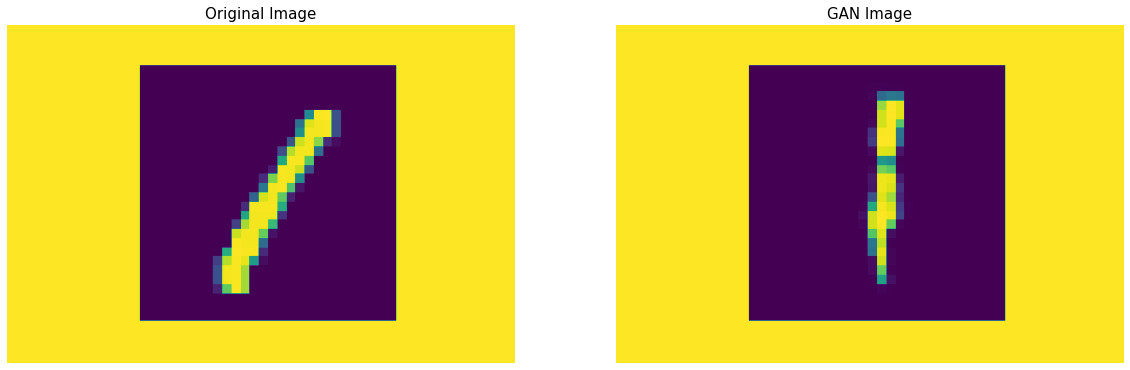

In [2]:
org_image = cv2.imread("1_org.png",cv2.IMREAD_GRAYSCALE)
gan_image = cv2.imread("1_gan.png",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(org_image)
plt.axis('off')
plt.title("Original Image",fontdict={'fontsize' : 15})
plt.subplot(1,2,2)
plt.imshow(gan_image)
plt.axis('off')
plt.title("GAN Image",fontdict={'fontsize' : 15})

<h1>Analyse different transform functions for Benford's Law</h1>
<p>Most commonly the below two transform functions are most used in image-related analysis.</p>
<ul>
    <li><b>Discrete Cosine Transform (DCT) : </b>Discrete Cosine Transform or DCT is a cosine based image transform that maps       an image from Pixel domain into Frequency Domain. It is an efficient method for image compression / conversion into             frequency domain. DCT uses 8x8 blocks for compression blocks. The output of the function gives each value in the 8x8 matrix.<br>
    <img src="dct.png">
    </li>
    <li><b>Discrete Fourier Transform (DFT) : </b>Discrete Fourier Transform is an exponential image transform based algorithm     that maps an image from Pixel domain into Frequency Domain.<br>
    <img src="dft.png" width="522" height="290">
    </li>
</ul>
<p>In the below code, we will examine if both can be used as a transform function for Benford's Law and if yes, which one is efficient. For evaluating the efficiency, we will check if both follows benford's law. If yes we calculate the time constraints taken to complete the execution of both transforms, else we choose the one that follows benford's law.</p>

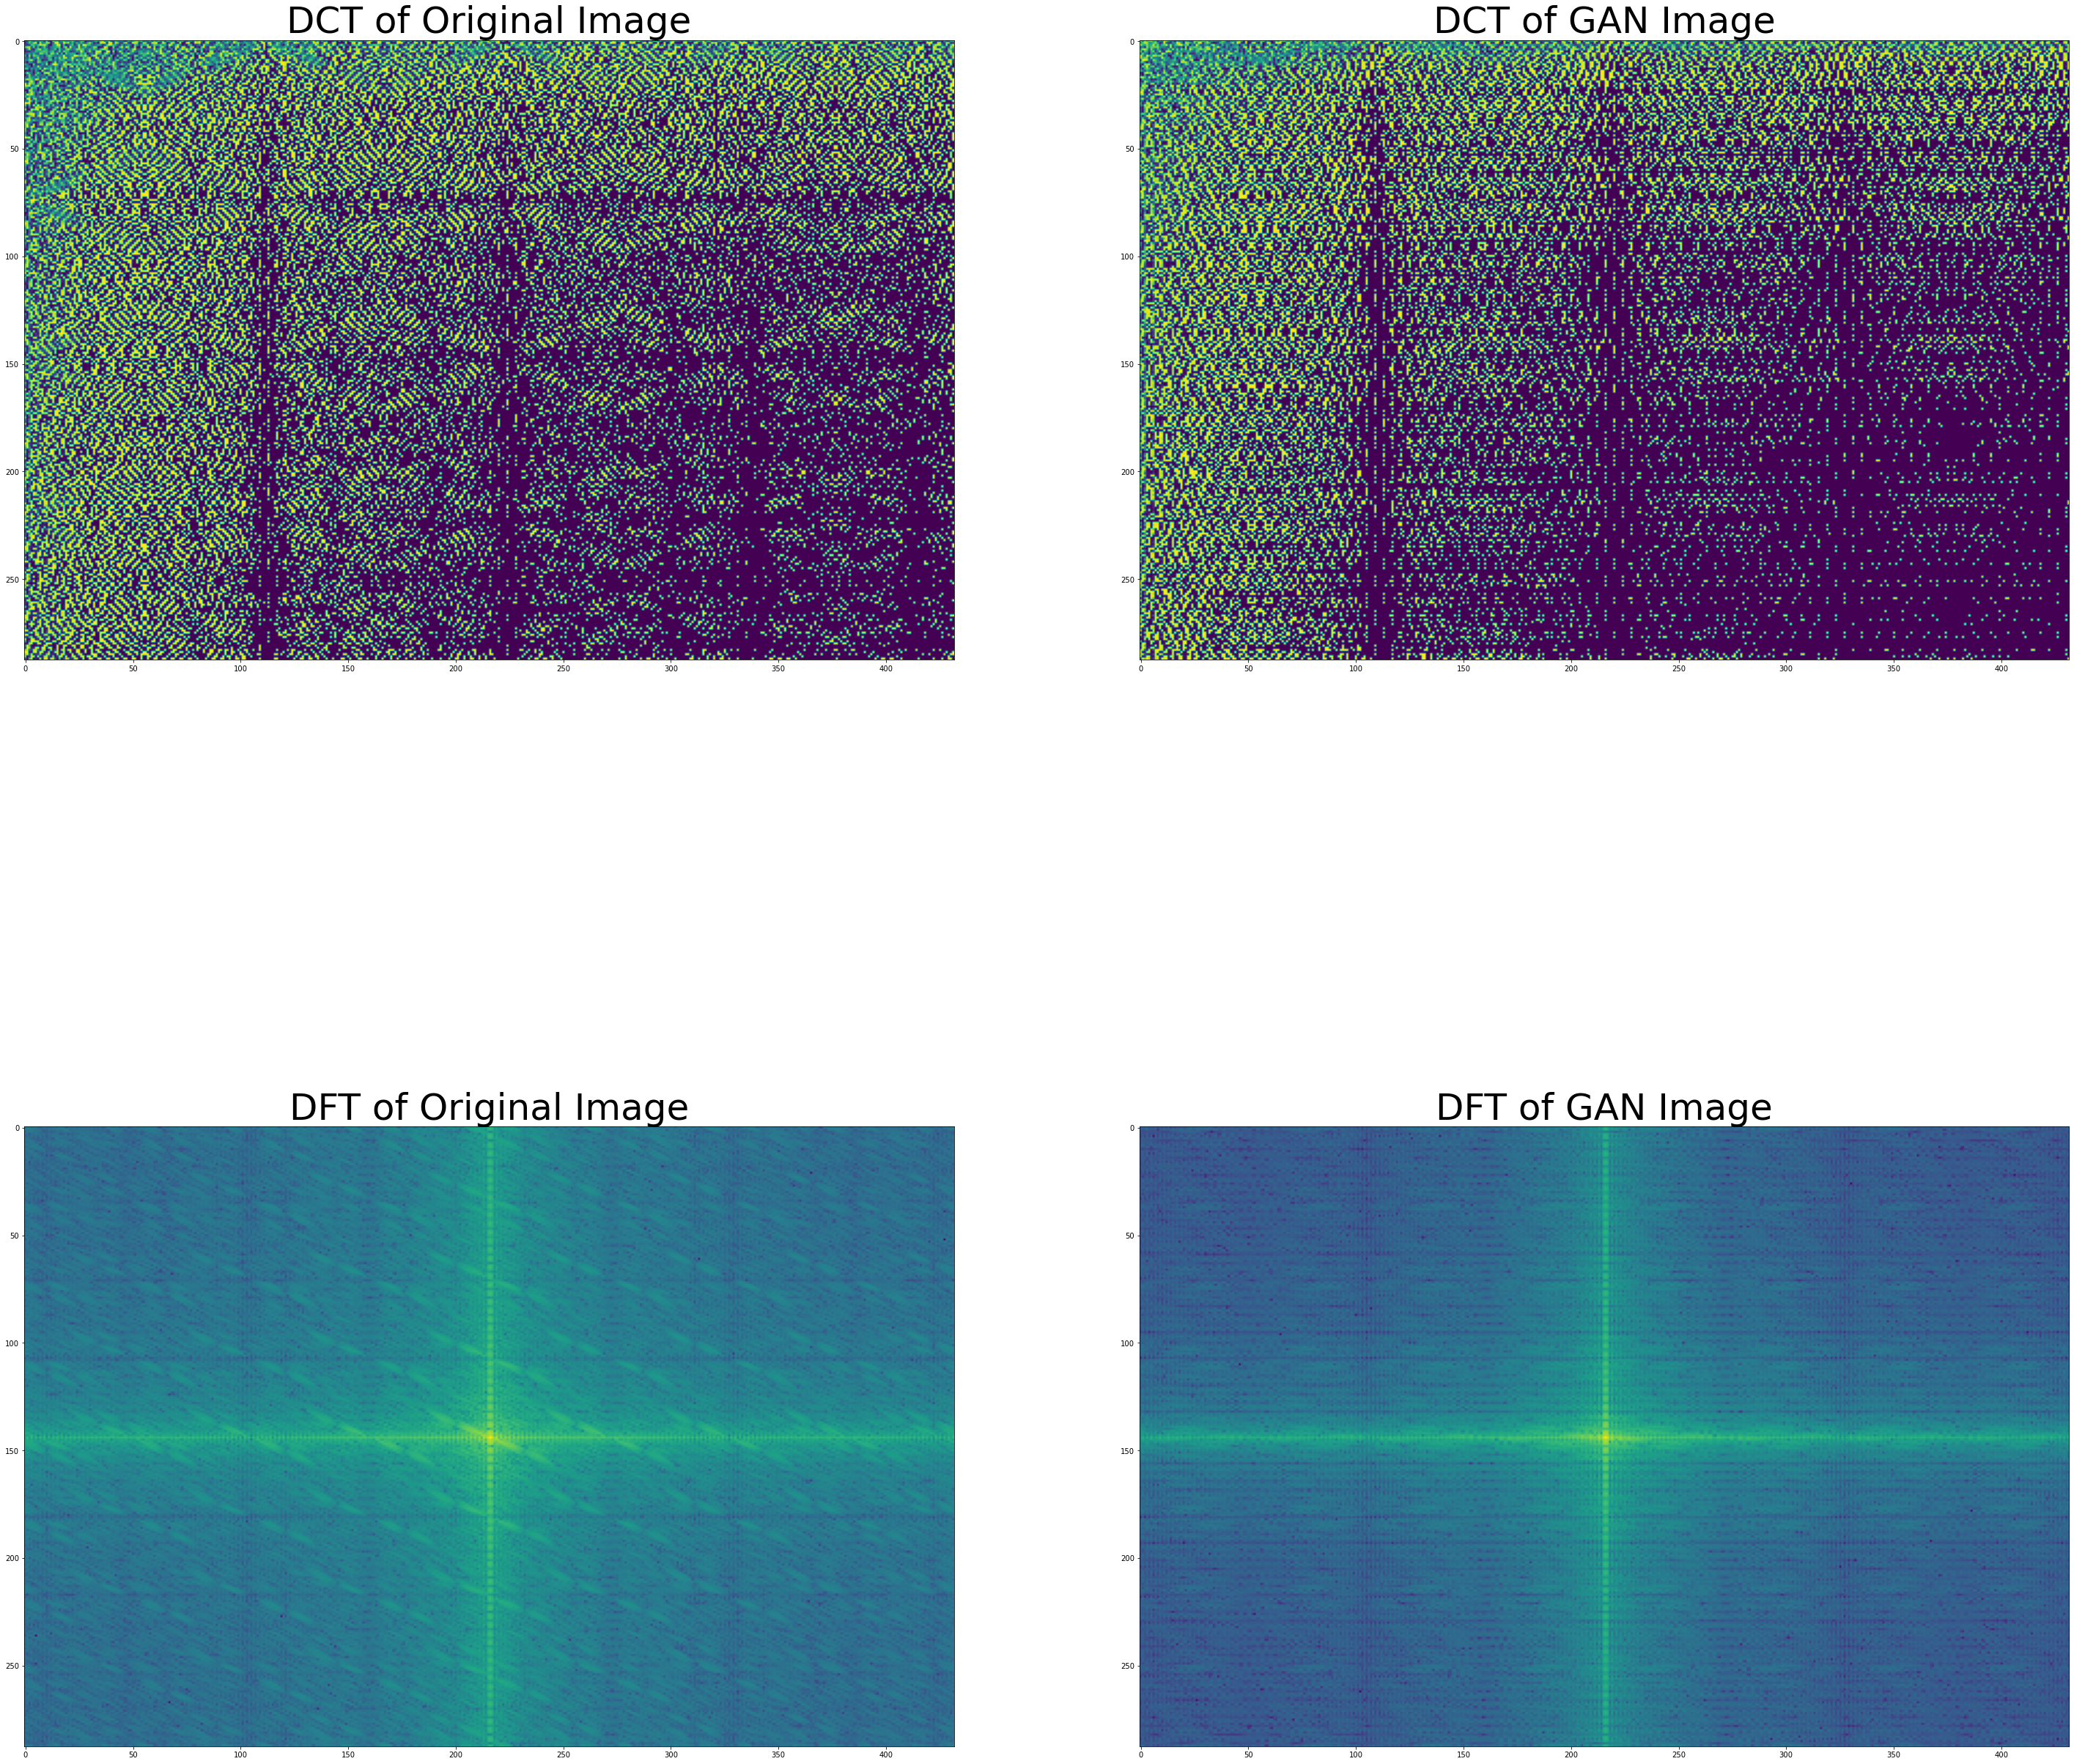

In [3]:
#DCT of both images
org_image_dct = np.float32(org_image) / 255.0
org_image_dct = np.uint8(cv2.dct(org_image_dct) * 255.0)
gan_image_dct = np.float32(gan_image) / 255.0
gan_image_dct = np.uint8(cv2.dct(gan_image_dct) * 255.0)

#DFT of both images
dft_org_image = np.fft.fft2(org_image)
dft_org_image = np.fft.fftshift(dft_org_image)
magnitude_spectrum_org = 20*np.log(np.abs(dft_org_image))

dft_gan_image = np.fft.fft2(gan_image)
dft_gan_image = np.fft.fftshift(dft_gan_image)
magnitude_spectrum_gan = 20*np.log(np.abs(dft_gan_image))

#Plotting images to visualize them
plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.title("DCT of Original Image",fontdict={'fontsize' : 50})
plt.imshow(org_image_dct)
plt.subplot(2,2,2)
plt.title("DCT of GAN Image",fontdict={'fontsize' : 50})
plt.imshow(gan_image_dct)
plt.subplot(2,2,3)
plt.title("DFT of Original Image",fontdict={'fontsize' : 50})
plt.imshow(magnitude_spectrum_org)
plt.subplot(2,2,4)
plt.title("DFT of GAN Image",fontdict={'fontsize' : 50})
plt.imshow(magnitude_spectrum_gan)
plt.show()

<h1>Analyzing DCT of images using Benford's Law</h1>

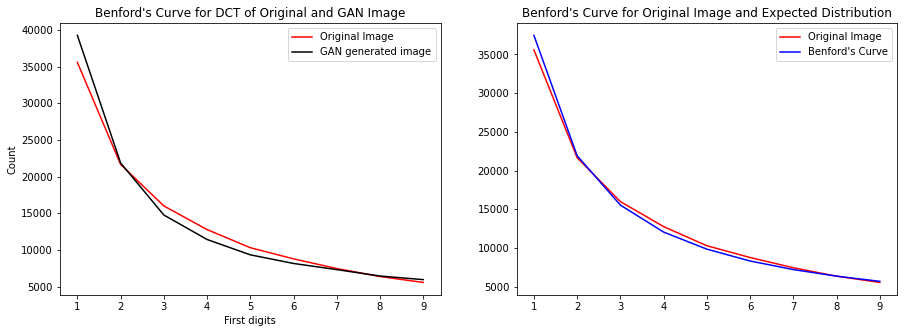

In [4]:
digit_count_benf = [0.3010,0.1761,0.1249,0.0969,0.0792,0.0669,0.0580,0.0512,0.0458]

#Benford's Curve for Original Image using DCT
digit_count_org = {'1' : 0,
               '2' : 0,
               '3' : 0,
               '4' : 0,
               '5' : 0,
               '6' : 0,
               '7' : 0,
               '8' : 0,
               '9' : 0}

dct_org_image = np.float32(org_image) / 255.0
dct_org_image = cv2.dct(dct_org_image)


for ele in dct_org_image.flatten():
    for item in str(ele):
        if item in ['-','0','.']:
            continue
        else:
            digit_count_org[item]+=1
            break
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)            
plt.plot(list(digit_count_org.keys()),list(digit_count_org.values()),c="red",label="Original Image")
plt.xlabel("First digits")
plt.ylabel("Count")
plt.title("Benford's Curve for DCT of Original and GAN Image")

#Benford's Curve for GAN generated image using DCT     
digit_count_gan = {'1' : 0,
               '2' : 0,
               '3' : 0,
               '4' : 0,
               '5' : 0,
               '6' : 0,
               '7' : 0,
               '8' : 0,
               '9' : 0}


dct_gan_image = np.float32(gan_image) / 255.0
dct_gan_image = cv2.dct((np.float32(dct_gan_image) / 255.0))

for ele in dct_gan_image.flatten():
    for item in str(ele):
        if item in ['-','0','.']:
            continue
        else:
            digit_count_gan[item]+=1
            break  
plt.plot(list(digit_count_gan.keys()),list(digit_count_gan.values()),c="black",label="GAN generated image")
plt.legend()

plt.subplot(1,2,2)
plt.plot(list(digit_count_org.keys()),list(digit_count_org.values()),c="red",label="Original Image")
plt.plot(list(digit_count_org.keys()),[i * sum(digit_count_org.values()) for i in digit_count_benf],c="blue",label="Benford's Curve")
plt.title("Benford's Curve for Original Image and Expected Distribution")
plt.legend()
plt.show()


    
<table style="margin : auto;">
<caption style="color:black;">Benford's Distribution</caption>
<tr>
<th>Digit</th>
<th>Occurence in Original Distribution</th>
<th>Occurence in Distribution with DCT of Original Image</th>
<th>Occurence in Distribution with DCT of GAN Image</th>
</tr>
<tr>
<td>1</td>
<td>30.10 %</td>
<td>29.0 %</td>
<td>32.0 %</td>
</tr>

<tr>
<td>2</td>
<td>17.61 %</td>
<td>17.0 %</td>
<td>18.0 %</td>
</tr>
    
<tr>
<td>3</td>
<td>12.49 %</td>
<td>13.0 %</td>
<td>12.0 %</td>
</tr>
    
<tr>
<td>4</td>
<td>9.69 %</td>
<td>10.0 %</td>
<td>9.00 %</td>
</tr>

<tr>
<td>5</td>
<td>7.92 %</td>
<td>8.00 %</td>
<td>7.00 %</td>
</tr>
<tr>
<td>6</td>
<td>6.69 %</td>
<td>7.00 %</td>
<td>7.00 %</td>
</tr>
<tr>
<td>7</td>
<td>5.80 %</td>
<td>6.00 %</td>
<td>6.00 %</td>
</tr>
<tr>
<td>8</td>
<td>5.12 %</td>
<td>5.00 %</td>
<td>5.00 %</td>
</tr>
<tr>
<td>9</td>
<td>4.58 %</td>
<td>4.00 %</td>
<td>5.00 %</td>
</tr>     
</table>       


<h1>Analysing DFT of images using Benford's Law</h1>

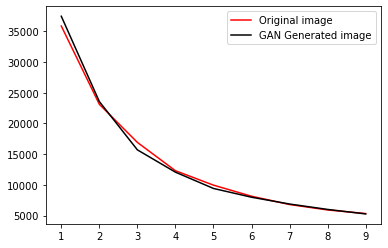

In [5]:
#Benford's Curve for Original Image using DFT
digit_count = {'1' : 0,
               '2' : 0,
               '3' : 0,
               '4' : 0,
               '5' : 0,
               '6' : 0,
               '7' : 0,
               '8' : 0,
               '9' : 0}

dft_org_image = np.fft.fft2(org_image)

for ele in dft_org_image.flatten():
    for item in str(ele.real):
        if item in ['-','0','.']:
            continue
        else:
            digit_count[item]+=1
            break
plt.plot(list(digit_count.keys()),list(digit_count.values()),c="red",label="Original image")

#Benford's Curve for GAN Image using DFT
dft_gan_image = np.fft.fft2(gan_image)

digit_count = {'1' : 0,
               '2' : 0,
               '3' : 0,
               '4' : 0,
               '5' : 0,
               '6' : 0,
               '7' : 0,
               '8' : 0,
               '9' : 0}

for ele in dft_gan_image.flatten():
    for item in str(ele.real):
        if item in ['-','0','.']:
            continue
        else:
            digit_count[item]+=1
            break
            
plt.plot(list(digit_count.keys()),list(digit_count.values()),c="black",label="GAN Generated image")
plt.legend()
plt.show()

<table>
<caption style="color:black;">Benford's Distribution</caption>
<tr>
<th>Digit</th>
<th>Occurence in Original Distribution</th>
<th>Occurence in Distribution with DFT of Original Image</th>
<th>Occurence in Distribution with DFT of GAN Image</th>
</tr>
<tr>
<td>1</td>
<td>30.10 %</td>
<td>29.0 %</td>
<td>30.0 %</td>
</tr>
        
<tr>
<td>2</td>
<td>17.61 %</td>
<td>19.0 %</td>
<td>19.0 %</td>
</tr>

<tr>
<td>3</td>
<td>12.49 %</td>
<td>14.0 %</td>
<td>13.0 %</td>
</tr>
        
<tr>
<td>4</td>
<td>9.69 %</td>
<td>10.0 %</td>
<td>10.0 %</td>
</tr>
        
<tr>
<td>5</td>
<td>7.92 %</td>
<td>8.0 %</td>
<td>8.0 %</td>
</tr>
        
<tr>
<td>6</td>
<td>6.69 %</td>
<td>7.0 %</td>
<td>6.0 %</td>
</tr>
<tr>
<td>7</td>
<td>5.80 %</td>
<td>5.0 %</td>
<td>6.0 %</td>
</tr>
        
<tr>
<td>8</td>
<td>5.12 %</td>
<td>5.0 %</td>
<td>5.0 %</td>
</tr>
        
<tr>
<td>9</td>
<td>4.58 %</td>
<td>4.0 %</td>
<td>4.0 %</td>
    
</table>

<p>Since both transform functions follow benford's law, let us take into account the time complexity for each transform function.</p>

In [6]:
#Time complexity for DCT
t_dct_start = time.time()
dct_org_image = cv2.normalize((np.float32(cv2.imread("stylegan.jpg",0)) / 255.0), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
dct_org_image = cv2.dct(dct_org_image)
t_dct_end = time.time()
print("Total time for DCT : ",t_dct_end - t_dct_start)

#Time complexity for DFT
t_dft_start = time.time()
dft_org_image = np.fft.fft2(cv2.imread("stylegan.jpg",0))
t_dft_end = time.time()
print("Total time for DFT : ",t_dft_end - t_dft_start)

Total time for DCT :  0.07498860359191895
Total time for DFT :  0.09193992614746094


<h3>Transform Function Conclusion</h3>
<p>The transform function for benford's law for image analysis an be concluded to be Discrete Cosine Transform (DCT) for the following reasons.</p>
<ul>
    <li style="text-align:justify;"><b>Close resemblence of original image with actual benford's distribution : </b>If you compare the <i>Benford's Distribution vs Benford's Distribution for Original Image with DCT</i> and <i>Benford's Distribution vs Benford's Distribution for GAN Image with DFT</i>, it is clear that DCT function follows a more closer resemblance with the benford's distribution. This accuracy is essential for flawless analysis of the image. </li>
    <li style="text-align:justify;"><b>Less time complexity : </b> In the previous section, we performed a time complexity analysis of DCT and DFT transform functions. It is evident that DCT takes faster to execute compared to DFT. Though time is not an impact factor for this experiment, it becomes significant for bigger images / videos.</li>
</ul>

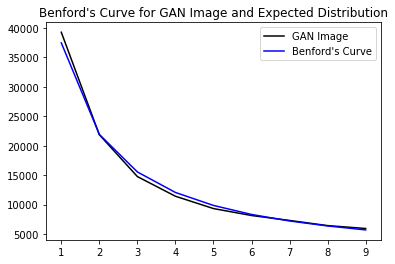

In [7]:
plt.plot(list(digit_count_gan.keys()),list(digit_count_gan.values()),c="black",label="GAN Image")
plt.plot(list(digit_count_gan.keys()),[i * sum(digit_count_gan.values()) for i in digit_count_benf],c="blue",label="Benford's Curve")
plt.title("Benford's Curve for GAN Image and Expected Distribution")
plt.legend()
plt.show()

<h1>Deviance Test</h1>
<p>Deviance test gives us an idea of how far the image is deviated from the original benford's distribution. Small deivations can be neglected while significant deviations point to the fact that the image has been tampered or is a deepfake. In this experiment, we will be using 3 deviance tests for comparing the underlying distribution of benford's law and the image we have.</p>
<ul>
    <li>Chi-square test</li>
    <li>Kolmogorov-Smirnov test</li>
    <li>Euclidean Distance test</li>
 </ul>

<h2>Chi-square test</h2>


In [8]:
digit_count_benf = [0.3010,0.1761,0.1249,0.0969,0.0792,0.0669,0.0580,0.0512,0.0458]
#performing chi-square for original image
obs = [i / sum(list(digit_count_org.values())) for i in list(digit_count_org.values())]
chisq = 0
for i in range(len(obs)):
    chisq += ((obs[i] - digit_count_benf[i])**2) / obs[i]
print("Chi-Square for original image: {:.8f}".format(chisq))

#performing chi-square for GAN image
obs = [i / sum(list(digit_count_gan.values())) for i in list(digit_count_gan.values())]
chisq = 0
for i in range(len(obs)):
    chisq += ((obs[i] - digit_count_benf[i])**2) / obs[i]
print("Chi-Square for GAN image: {:.8f}".format(chisq))

Chi-Square for original image: 0.00166915
Chi-Square for GAN image: 0.00166215


<h2>Kolmogorov-Smirnov test</h2>

In [9]:
digit_count_benf = [0.3010,0.1761,0.1249,0.0969,0.0792,0.0669,0.0580,0.0512,0.0458]
#performing KS for original image
obs = [i / sum(list(digit_count_org.values())) for i in list(digit_count_org.values())]
print("KS for original image: {:.8f}".format(ks_2samp(obs, digit_count_benf).statistic))

#performing KS for GAN image
obs = [i / sum(list(digit_count_gan.values())) for i in list(digit_count_gan.values())]
print("KS for GAN image: {:.8f}".format(ks_2samp(obs, digit_count_benf).statistic))

KS for original image: 0.11111111
KS for GAN image: 0.11111111


<h2>Euclidean Distance test</h2>

In [10]:
digit_count_benf = [0.3010,0.1761,0.1249,0.0969,0.0792,0.0669,0.0580,0.0512,0.0458]
#performing ED for original image
obs = [i / sum(list(digit_count_org.values())) for i in list(digit_count_org.values())]
print("Euclidean test for original image: {:.8f}".format(np.linalg.norm(np.array(obs) - np.array(digit_count_benf))))

#performing EDd for GAN image
obs = [i / sum(list(digit_count_gan.values())) for i in list(digit_count_gan.values())]
print("Euclidean test for GAN image: {:.8f}".format(np.linalg.norm(np.array(obs) - np.array(digit_count_benf))))

Euclidean test for original image: 0.01757071
Euclidean test for GAN image: 0.01737901


<h3>Deviance Test Conclusion</h3>
<p> From the above three tests, it is evident that Euclidean test provides more readability for the values and hence an easy jugement of the variance. The original image varies from expected benford's distrubtion by about 0.0175 while the GAN image varies about 0.0173. The dip in teh variance is explained by dipping of the GAN image benford curve below the original image benford curve. </p>

Euclidean test for GAN image: 0.02104878


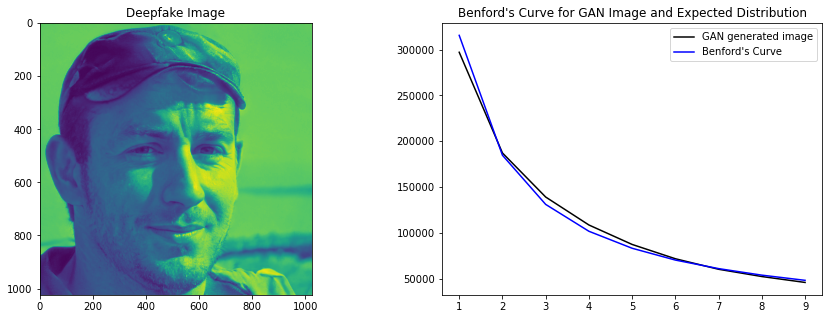

In [11]:
deepfake = cv2.imread("stylegan.jpg",cv2.IMREAD_GRAYSCALE)
dct_deepfake = cv2.dct(deepfake / 255.0)

digit_count_stylegan = {'1' : 0, \
               '2' : 0,
               '3' : 0,
               '4' : 0,
               '5' : 0,
               '6' : 0,
               '7' : 0,
               '8' : 0,
               '9' : 0}


for ele in dct_deepfake.flatten():
    for item in str(ele):
        if item in ['-','0','.']:
            continue
        else:
            digit_count_stylegan[item]+=1
            break
            
            
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Deepfake Image")
plt.imshow(deepfake)

plt.subplot(1,2,2)
plt.plot(list(digit_count_stylegan.keys()),list(digit_count_stylegan.values()),c="black",label="GAN generated image")
plt.plot(list(digit_count_stylegan.keys()),[i * sum(digit_count_stylegan.values()) for i in digit_count_benf],c="blue",label="Benford's Curve")
plt.title("Benford's Curve for GAN Image and Expected Distribution")
plt.legend()
plt.legend()

#performing ED for deepfake image
obs = [i / sum(list(digit_count_stylegan.values())) for i in list(digit_count_stylegan.values())]
print("Euclidean test for GAN image: {:.8f}".format(np.linalg.norm(np.array(obs) - np.array(digit_count_benf))))


<p>The Euclidean distance of Deepfake from Original Benford's Distribution is 0.021 which can be considered a significant variance</p>

<h2>Conclusion and Result</h2>
<p>From the above figure of DCT transform for both images, it is evident that real images do follow benford's while the gan generated image from the same dataset deviates from the benford's curve of actual image.</p>